# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader
from sklearn.metrics import r2_score

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2015-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,10328.500000,10120.250000,10326.750000,10167.450195,936500.0,10167.450195
2020-06-09,10291.150391,10021.450195,10181.150391,10046.650391,754200.0,10046.650391
2020-06-10,10148.750000,10036.849609,10072.599609,10116.150391,632400.0,10116.150391
2020-06-11,10112.049805,9885.049805,10094.099609,9902.000000,715500.0,9902.000000
2020-06-12,9996.049805,9544.349609,9544.950195,9972.900391,796300.0,9972.900391


In [4]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998099,0.998982,0.999108,0.187268,0.999108
Low,0.998099,1.000000,0.998976,0.998850,0.154963,0.998850
Open,0.998982,0.998976,1.000000,0.998107,0.172718,0.998107
Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000
Volume,0.187268,0.154963,0.172718,0.170811,1.000000,0.170811
Adj Close,0.999108,0.998850,0.998107,1.000000,0.170811,1.000000


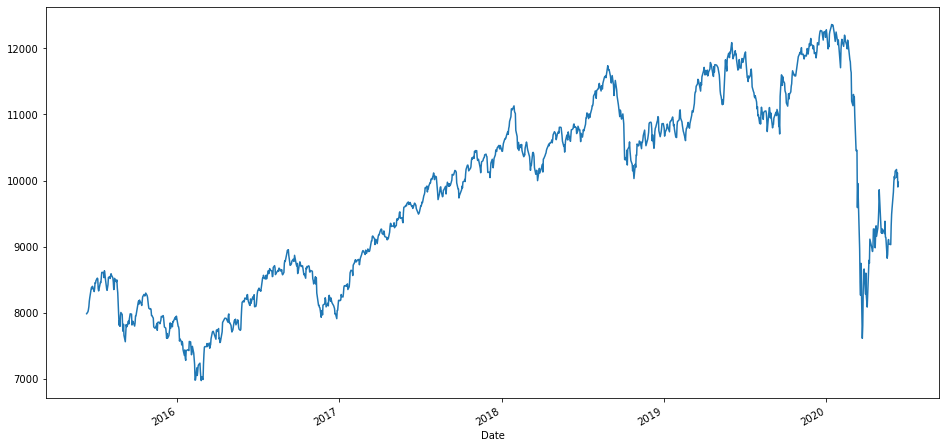

In [5]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [6]:
n=10
X = pd.DataFrame(index=data[['Adj Close']][0:n].index.copy())
for i in range(data.shape[0]-n):
    X[f'{i}'] = np.array(data['Adj Close'][i:n+i].values)
X = X.transpose()
X.index=data.tail(X.shape[0]).index
X = pd.concat([X,data[['Adj Close']].tail(X.shape[0])],axis = 1, sort = False)
X.drop(['Adj Close'],axis=1,inplace=True)

In [7]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,2015-06-12 00:00:00,2015-06-15 00:00:00,2015-06-16 00:00:00,2015-06-17 00:00:00,2015-06-18 00:00:00,2015-06-19 00:00:00,2015-06-22 00:00:00,2015-06-23 00:00:00,2015-06-24 00:00:00,2015-06-25 00:00:00
2015-06-12 00:00:00,1.000000,0.997165,0.994555,0.991587,0.988459,0.985334,0.981476,0.978446,0.974733,0.971052
2015-06-15 00:00:00,0.997165,1.000000,0.997157,0.994538,0.991570,0.988433,0.985306,0.981473,0.978437,0.974731
2015-06-16 00:00:00,0.994555,0.997157,1.000000,0.997153,0.994532,0.991561,0.988422,0.985311,0.981476,0.978435
2015-06-17 00:00:00,0.991587,0.994538,0.997153,1.000000,0.997149,0.994528,0.991555,0.988428,0.985317,0.981469
2015-06-18 00:00:00,0.988459,0.991570,0.994532,0.997149,1.000000,0.997145,0.994522,0.991560,0.988431,0.985312
2015-06-19 00:00:00,0.985334,0.988433,0.991561,0.994528,0.997145,1.000000,0.997143,0.994521,0.991560,0.988415
2015-06-22 00:00:00,0.981476,0.985306,0.988422,0.991555,0.994522,0.997143,1.000000,0.997140,0.994521,0.991542
2015-06-23 00:00:00,0.978446,0.981473,0.985311,0.988428,0.991560,0.994521,0.997140,1.000000,0.997137,0.994512
2015-06-24 00:00:00,0.974733,0.978437,0.981476,0.985317,0.988431,0.991560,0.994521,0.997137,1.000000,0.997126
2015-06-25 00:00:00,0.971052,0.974731,0.978435,0.981469,0.985312,0.988415,0.991542,0.994512,0.997126,1.000000


In [8]:
y = data[['Adj Close']].tail(X.shape[0])
y=y.rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [9]:
d = 40
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Multiple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r2_score(y_test, regressor.predict(X_test))

0.7713052615992576

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 8996.33  8992.8 ]
 [ 8839.51  9266.75]
 [ 9422.39  9261.85]
 [ 9228.67  8981.45]
 [ 9028.81  9187.3 ]
 [ 9177.4   9313.9 ]
 [ 9322.13  9154.4 ]
 [ 9140.66  9282.3 ]
 [ 9286.53  9380.9 ]
 [ 9453.85  9553.35]
 [ 9499.29  9859.9 ]
 [ 9860.42  9293.5 ]
 [ 9387.79  9205.6 ]
 [ 9139.47  9270.9 ]
 [ 9271.69  9199.05]
 [ 9233.65  9251.5 ]
 [ 9165.74  9239.2 ]
 [ 9361.07  9196.55]
 [ 9140.87  9383.55]
 [ 9333.23  9142.75]
 [ 9198.54  9136.85]
 [ 9110.62  8823.25]
 [ 8824.39  8879.1 ]
 [ 8888.7   9066.55]
 [ 9006.17  9106.25]
 [ 9184.05  9039.25]
 [ 8986.43  9029.05]
 [ 9069.71  9314.95]
 [ 9289.12  9490.1 ]
 [ 9489.58  9580.3 ]
 [ 9621.02  9826.15]
 [ 9850.09  9979.1 ]
 [10014.48 10061.55]
 [10047.85 10029.1 ]
 [10061.66 10142.15]
 [10182.28 10167.45]
 [10160.75 10046.65]
 [10067.11 10116.15]
 [10114.3   9902.  ]
 [ 9929.38  9972.9 ]]


regressor.predict([[86.95,90.95,90,88.25]])

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


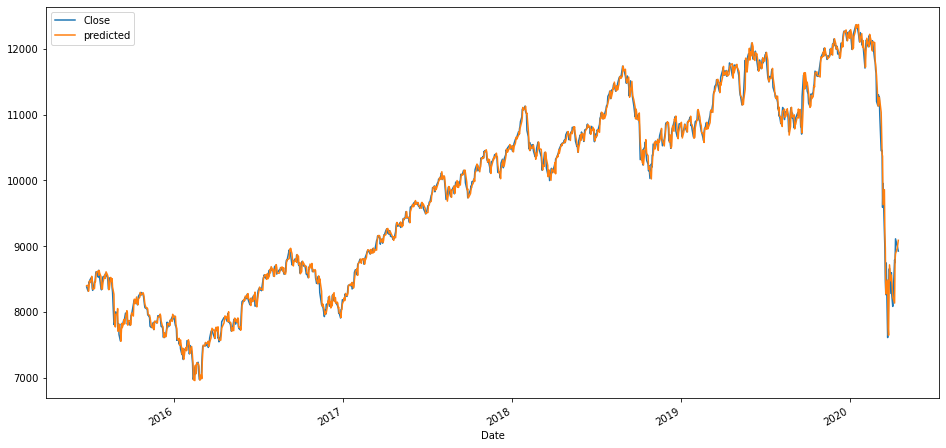

In [12]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


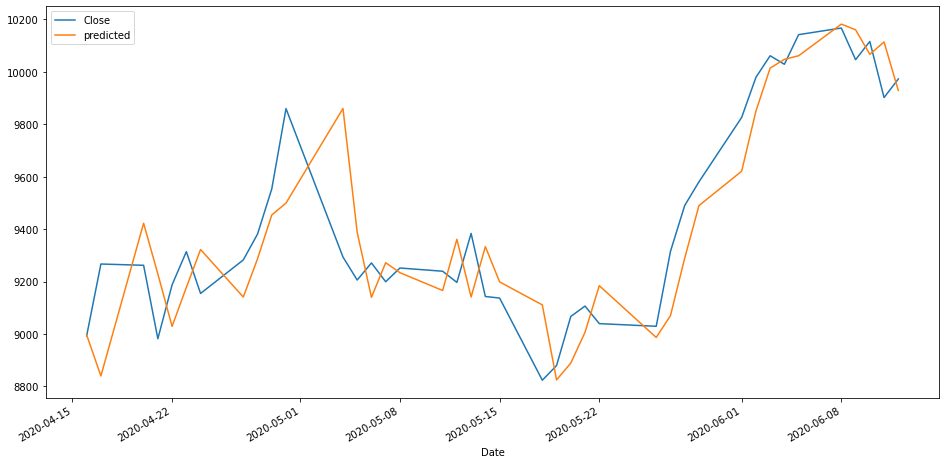

In [13]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [14]:
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

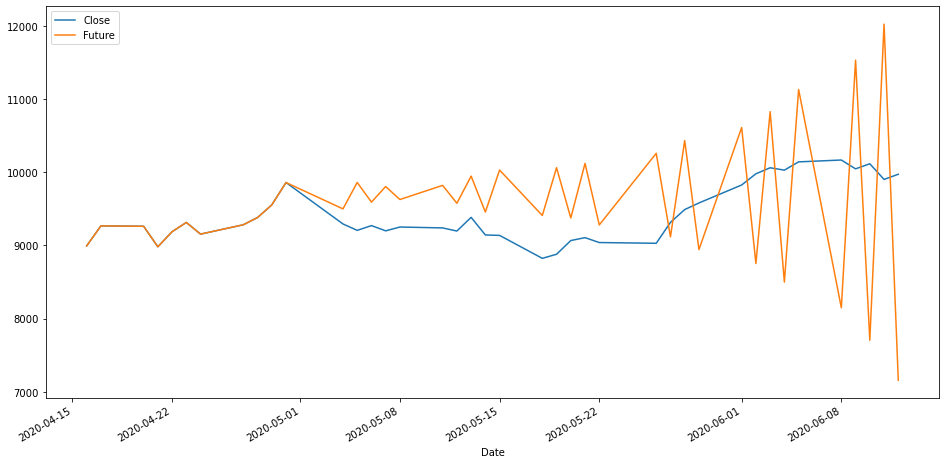

In [15]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [16]:
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-6.23493064724029